In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [301]:
rider_df = pd.read_csv('rider_performance_per_type_race.csv', index_col=0)

In [302]:
rider_df.drop(columns='avg_rnk_gc', inplace=True)

In [303]:
rider_df.columns

Index(['fullname', 'team', 'team_code', 'country', 'height', 'weight',
       'birthplace', 'rider_code', 'age', 'nb_race_flat', 'nb_win_flat',
       'nb_pod_flat', 'nb_top10_flat', 'pts_flat', 'avg_rnk_flat',
       'pct_win_flat', 'pct_pod_flat', 'pct_top10_flat', 'avg_pts_flat',
       'nb_race_climb', 'nb_win_climb', 'nb_pod_climb', 'nb_top10_climb',
       'pts_climb', 'avg_rnk_climb', 'pct_win_climb', 'pct_pod_climb',
       'pct_top10_climb', 'avg_pts_climb', 'nb_race_time_trial',
       'nb_win_time_trial', 'nb_pod_time_trial', 'nb_top10_time_trial',
       'pts_time_trial', 'avg_rnk_time_trial', 'pct_win_time_trial',
       'pct_pod_time_trial', 'pct_top10_time_trial', 'avg_pts_time_trial',
       'nb_gc_finished', 'nb_win_gc', 'nb_pod_gc', 'nb_top10_gc', 'pts_gc',
       'pct_win_gc', 'pct_pod_gc', 'pct_top10_gc', 'avg_pts_gc',
       'nb_race_one_day', 'nb_win_one_day', 'nb_pod_one_day',
       'nb_top10_one_day', 'pts_one_day', 'avg_rnk_one_day', 'pct_win_one_day',
       

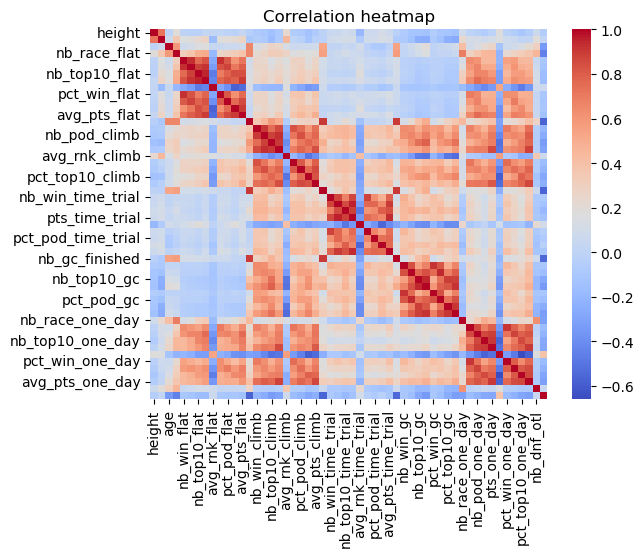

In [304]:
corr_matrix = rider_df.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

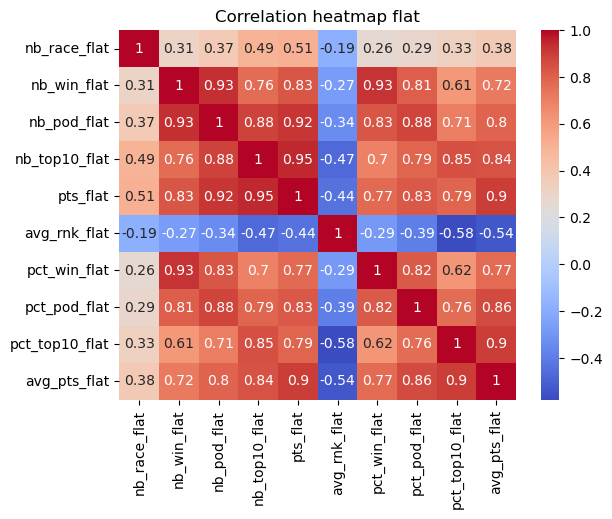

In [32]:
rider_df_flat = rider_df[['rider_code', 'nb_race_flat', 'nb_win_flat',
       'nb_pod_flat', 'nb_top10_flat', 'pts_flat', 'avg_rnk_flat',
       'pct_win_flat', 'pct_pod_flat', 'pct_top10_flat', 'avg_pts_flat']]

corr_matrix_flat = rider_df_flat.corr()
sns.heatmap(corr_matrix_flat, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap flat')
plt.show()
# suggestion for removing nb_win_flat, nb_pod_flat, nb_top10_flat, pts_flat

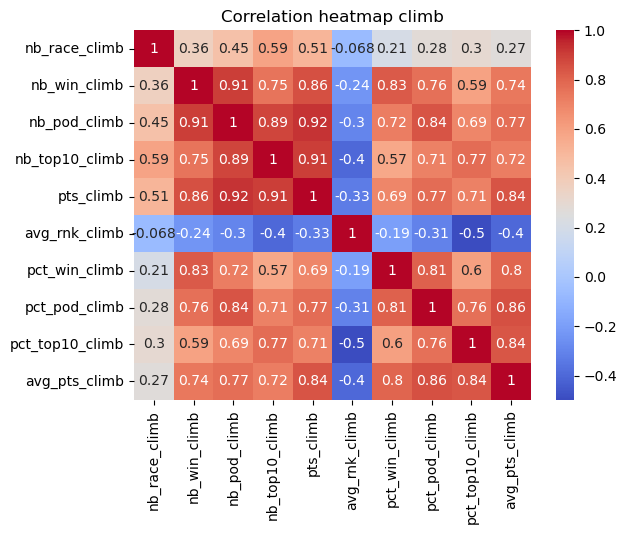

In [30]:
rider_df_climb = rider_df[['nb_race_climb', 'nb_win_climb', 'nb_pod_climb', 'nb_top10_climb',
       'pts_climb', 'avg_rnk_climb', 'pct_win_climb', 'pct_pod_climb',
       'pct_top10_climb', 'avg_pts_climb']]
rider_df_climb
corr_matrix_climb = rider_df_climb.corr()
sns.heatmap(corr_matrix_climb, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap climb')
plt.show()

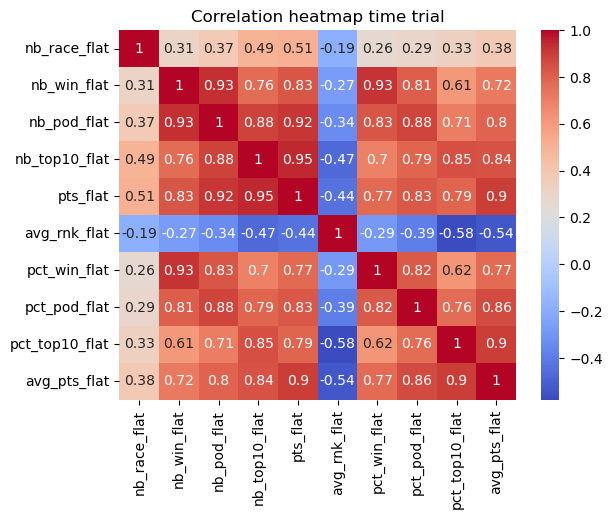

In [17]:
rider_df_time_trial = rider_df[['nb_race_time_trial', 'nb_win_time_trial', 'nb_pod_time_trial', 'nb_top10_time_trial',
       'pts_time_trial', 'avg_rnk_time_trial', 'pct_win_time_trial', 'pct_pod_time_trial',
       'pct_top10_time_trial', 'avg_pts_time_trial']]
rider_df_time_trial
corr_matrix_time_trial = rider_df_time_trial.corr()
sns.heatmap(corr_matrix_time_trial, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap time trial')
plt.show()

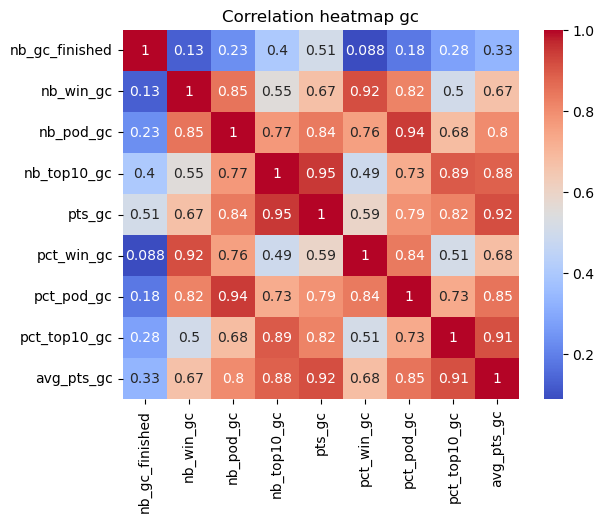

In [305]:
rider_df_gc = rider_df[['nb_gc_finished', 'nb_win_gc', 'nb_pod_gc', 'nb_top10_gc',
       'pts_gc', 'pct_win_gc', 'pct_pod_gc',
       'pct_top10_gc', 'avg_pts_gc']]
rider_df_gc
corr_matrix_gc = rider_df_gc.corr()
sns.heatmap(corr_matrix_gc, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap gc')
plt.show()

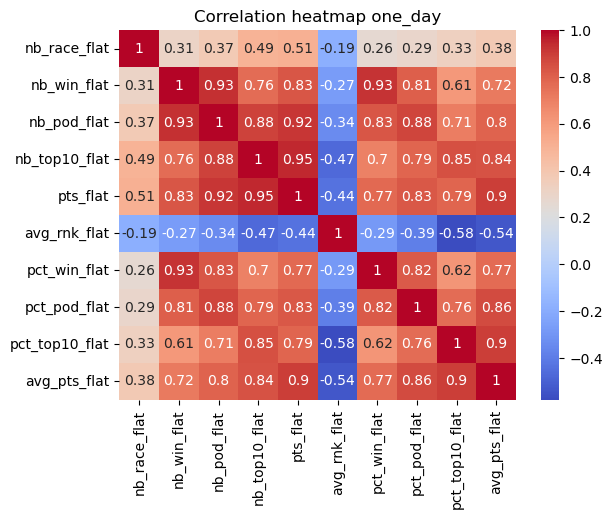

In [20]:
rider_df_one_day = rider_df[['nb_race_one_day', 'avg_rnk_one_day', 'pct_win_one_day', 'pct_pod_one_day',
       'pct_top10_one_day', 'avg_pts_one_day']]
rider_df_one_day
corr_matrix_one_day = rider_df_one_day.corr()
sns.heatmap(corr_matrix_one_day, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap one_day')
plt.show()

In [306]:
rider_df_no_na = rider_df.copy()

In [307]:
rider_df_no_na.isna().sum()

fullname                  0
team                      0
team_code                 0
country                   0
height                   57
weight                   87
birthplace                0
rider_code                0
age                       0
nb_race_flat             43
nb_win_flat              43
nb_pod_flat              43
nb_top10_flat            43
pts_flat                 43
avg_rnk_flat             58
pct_win_flat             43
pct_pod_flat             43
pct_top10_flat           43
avg_pts_flat             43
nb_race_climb            20
nb_win_climb             20
nb_pod_climb             20
nb_top10_climb           20
pts_climb                20
avg_rnk_climb            41
pct_win_climb            20
pct_pod_climb            20
pct_top10_climb          20
avg_pts_climb            20
nb_race_time_trial      259
nb_win_time_trial       259
nb_pod_time_trial       259
nb_top10_time_trial     259
pts_time_trial          259
avg_rnk_time_trial      263
pct_win_time_trial  

In [308]:
display('height: ', rider_df_no_na['height'].describe())
display('weight: ', rider_df_no_na['weight'].describe())

'height: '

count    879.000000
mean       1.807429
std        0.065100
min        1.580000
25%        1.760000
50%        1.810000
75%        1.850000
max        2.020000
Name: height, dtype: float64

'weight: '

count    849.000000
mean      68.591402
std        6.609203
min       50.000000
25%       64.000000
50%       69.000000
75%       73.000000
max       90.000000
Name: weight, dtype: float64

In [309]:
rider_df_no_na['height'].fillna(1.81, inplace=True)
rider_df_no_na['weight'].fillna(69, inplace=True)
rider_df_no_na.isna().sum()

fullname                  0
team                      0
team_code                 0
country                   0
height                    0
weight                    0
birthplace                0
rider_code                0
age                       0
nb_race_flat             43
nb_win_flat              43
nb_pod_flat              43
nb_top10_flat            43
pts_flat                 43
avg_rnk_flat             58
pct_win_flat             43
pct_pod_flat             43
pct_top10_flat           43
avg_pts_flat             43
nb_race_climb            20
nb_win_climb             20
nb_pod_climb             20
nb_top10_climb           20
pts_climb                20
avg_rnk_climb            41
pct_win_climb            20
pct_pod_climb            20
pct_top10_climb          20
avg_pts_climb            20
nb_race_time_trial      259
nb_win_time_trial       259
nb_pod_time_trial       259
nb_top10_time_trial     259
pts_time_trial          259
avg_rnk_time_trial      263
pct_win_time_trial  

In [310]:
rider_df_no_na.fillna(0, inplace=True)
rider_df_no_na.isnull().sum()

fullname                0
team                    0
team_code               0
country                 0
height                  0
weight                  0
birthplace              0
rider_code              0
age                     0
nb_race_flat            0
nb_win_flat             0
nb_pod_flat             0
nb_top10_flat           0
pts_flat                0
avg_rnk_flat            0
pct_win_flat            0
pct_pod_flat            0
pct_top10_flat          0
avg_pts_flat            0
nb_race_climb           0
nb_win_climb            0
nb_pod_climb            0
nb_top10_climb          0
pts_climb               0
avg_rnk_climb           0
pct_win_climb           0
pct_pod_climb           0
pct_top10_climb         0
avg_pts_climb           0
nb_race_time_trial      0
nb_win_time_trial       0
nb_pod_time_trial       0
nb_top10_time_trial     0
pts_time_trial          0
avg_rnk_time_trial      0
pct_win_time_trial      0
pct_pod_time_trial      0
pct_top10_time_trial    0
avg_pts_time

In [311]:
rider_df_no_na.drop(columns=['fullname','team','team_code','country','birthplace','rider_code'], inplace=True)

In [312]:
rider_df_no_na.dtypes

height                  float64
weight                  float64
age                     float64
nb_race_flat            float64
nb_win_flat             float64
nb_pod_flat             float64
nb_top10_flat           float64
pts_flat                float64
avg_rnk_flat            float64
pct_win_flat            float64
pct_pod_flat            float64
pct_top10_flat          float64
avg_pts_flat            float64
nb_race_climb           float64
nb_win_climb            float64
nb_pod_climb            float64
nb_top10_climb          float64
pts_climb               float64
avg_rnk_climb           float64
pct_win_climb           float64
pct_pod_climb           float64
pct_top10_climb         float64
avg_pts_climb           float64
nb_race_time_trial      float64
nb_win_time_trial       float64
nb_pod_time_trial       float64
nb_top10_time_trial     float64
pts_time_trial          float64
avg_rnk_time_trial      float64
pct_win_time_trial      float64
pct_pod_time_trial      float64
pct_top1

In [313]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(rider_df_no_na)
riders_scaled = scaler.transform(rider_df_no_na)
riders_scaled_df = pd.DataFrame(riders_scaled, columns = rider_df_no_na.columns)
display(riders_scaled_df.head(2))
display(riders_scaled_df.describe())

,height,weight,age,nb_race_flat,nb_win_flat,nb_pod_flat,nb_top10_flat,pts_flat,avg_rnk_flat,pct_win_flat,...,nb_pod_one_day,nb_top10_one_day,pts_one_day,avg_rnk_one_day,pct_win_one_day,pct_pod_one_day,pct_top10_one_day,avg_pts_one_day,nb_dnf_otl,pct_dnf_otl
0,-0.437490,0.694635,1.169597,3.471299,13.473051,12.257309,7.880820,8.242314,-0.918148,7.962030,...,2.371583,1.889061,2.009818,-0.528592,1.725700,1.590441,1.339834,1.421310,1.829139,-0.552832
1,1.307049,0.217836,0.726561,1.120658,0.574718,0.422520,-0.029403,0.598137,0.034333,0.694294,...,0.515949,0.040380,0.490238,-0.372525,0.799911,0.665385,0.142177,0.721907,-0.346943,-0.732388


,height,weight,age,nb_race_flat,nb_win_flat,nb_pod_flat,nb_top10_flat,pts_flat,avg_rnk_flat,pct_win_flat,...,nb_pod_one_day,nb_top10_one_day,pts_one_day,avg_rnk_one_day,pct_win_one_day,pct_pod_one_day,pct_top10_one_day,avg_pts_one_day,nb_dnf_otl,pct_dnf_otl
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,...,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,3.866802e-17,1.090933e-15,1.152924e-16,-4.981770e-17,3.135550e-16,1.029269e-15,1.085314e-16,1.769714e-16,1.712780e-16,3.129619e-16,...,-5.057683e-16,1.022923e-15,-2.382947e-16,1.397268e-16,-2.655758e-16,1.033717e-15,-6.388527e-16,-6.298381e-17,-2.846726e-18,3.677021e-16
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,...,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-3.609380e+00,-2.960821e+00,-1.931658e+00,-1.279996e+00,-1.840071e-01,-2.349678e-01,-3.589954e-01,-3.648261e-01,-2.252619e+00,-2.035409e-01,...,-4.118673e-01,-5.758477e-01,-5.396742e-01,-2.468094e+00,-2.942036e-01,-4.278637e-01,-6.772720e-01,-6.144839e-01,-1.351288e+00,-9.118436e-01
25%,-7.546793e-01,-7.357606e-01,-8.240668e-01,-9.299009e-01,-1.840071e-01,-2.349678e-01,-3.589954e-01,-3.648261e-01,-6.125980e-01,-2.035409e-01,...,-4.118673e-01,-5.758477e-01,-5.051905e-01,-6.122435e-01,-2.942036e-01,-4.278637e-01,-6.772720e-01,-5.317747e-01,-6.817244e-01,-6.417548e-01
50%,3.829311e-02,5.890364e-02,-1.595121e-01,-1.796964e-01,-1.840071e-01,-2.349678e-01,-3.589954e-01,-3.438160e-01,7.349802e-02,-2.035409e-01,...,-4.118673e-01,-3.704386e-01,-3.649570e-01,2.038376e-05,-2.942036e-01,-4.278637e-01,-4.292938e-01,-3.527748e-01,-1.795518e-01,-3.677101e-01
75%,6.726710e-01,6.946351e-01,7.265609e-01,7.705626e-01,-1.840071e-01,-2.349678e-01,-1.941991e-01,-1.477217e-01,6.784402e-01,-2.035409e-01,...,5.204100e-02,4.037957e-02,4.999640e-02,6.107724e-01,-2.942036e-01,-8.848629e-03,2.469188e-01,7.866795e-02,4.900118e-01,2.866609e-01
max,3.368777e+00,3.396494e+00,2.720225e+00,3.471299e+00,1.347305e+01,1.225731e+01,7.880820e+00,8.431405e+00,2.837612e+00,1.100144e+01,...,8.402391e+00,5.791834e+00,9.915772e+00,4.284294e+00,1.137635e+01,7.177343e+00,5.014406e+00,9.252248e+00,4.340002e+00,4.681177e+00


In [369]:
# since there are 0 value in avg rnk (0 participations), we can not use this in clustering
riders_scaled_df.drop(columns=['avg_rnk_flat','avg_rnk_climb','avg_rnk_time_trial','avg_rnk_gc','avg_rnk_one_day'], inplace=True)

In [370]:
riders_scaled_df.columns

Index(['height', 'weight', 'age', 'nb_race_flat', 'nb_win_flat', 'nb_pod_flat',
       'nb_top10_flat', 'pts_flat', 'pct_win_flat', 'pct_pod_flat',
       'pct_top10_flat', 'avg_pts_flat', 'nb_race_climb', 'nb_win_climb',
       'nb_pod_climb', 'nb_top10_climb', 'pts_climb', 'pct_win_climb',
       'pct_pod_climb', 'pct_top10_climb', 'avg_pts_climb',
       'nb_race_time_trial', 'nb_win_time_trial', 'nb_pod_time_trial',
       'nb_top10_time_trial', 'pts_time_trial', 'pct_win_time_trial',
       'pct_pod_time_trial', 'pct_top10_time_trial', 'avg_pts_time_trial',
       'nb_gc_finished', 'nb_win_gc', 'nb_pod_gc', 'nb_top10_gc', 'pts_gc',
       'pct_win_gc', 'pct_pod_gc', 'pct_top10_gc', 'avg_pts_gc',
       'nb_race_one_day', 'nb_win_one_day', 'nb_pod_one_day',
       'nb_top10_one_day', 'pts_one_day', 'pct_win_one_day', 'pct_pod_one_day',
       'pct_top10_one_day', 'avg_pts_one_day', 'nb_dnf_otl', 'pct_dnf_otl'],
      dtype='object')

# Performing the clusterings on all metrics

## Determining the best number of clusters

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

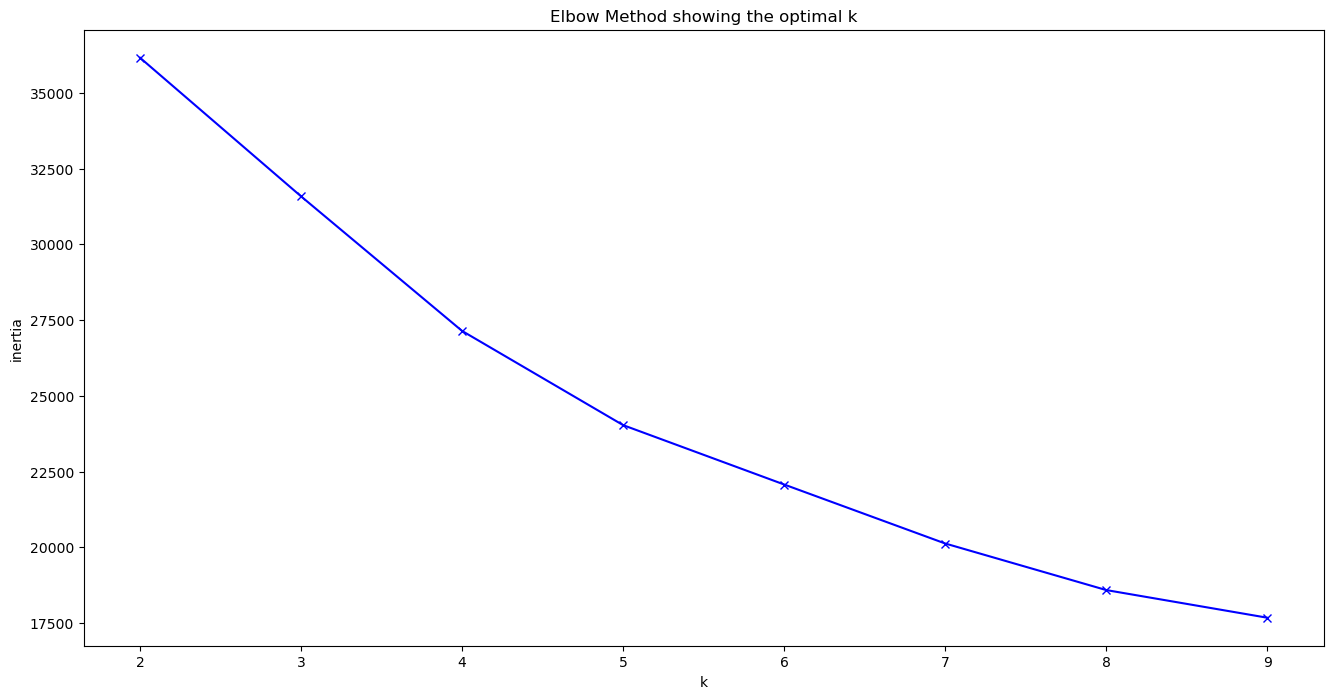

In [371]:
# determining the number of clusters
K = range(2, 10)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(riders_scaled_df)
    inertia.append(kmeans.inertia_)
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# output best one seems 5 clusters

In [372]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(riders_scaled_df)

KMeans(n_clusters=5, random_state=1234)

In [373]:
riders_scaled_df

,height,weight,age,nb_race_flat,nb_win_flat,nb_pod_flat,nb_top10_flat,pts_flat,pct_win_flat,pct_pod_flat,...,nb_win_one_day,nb_pod_one_day,nb_top10_one_day,pts_one_day,pct_win_one_day,pct_pod_one_day,pct_top10_one_day,avg_pts_one_day,nb_dnf_otl,pct_dnf_otl
0,-0.437490,0.694635,1.169597,3.471299,13.473051,12.257309,7.880820,8.242314,7.962030,7.001735,...,2.695194,2.371583,1.889061,2.009818,1.725700,1.590441,1.339834,1.421310,1.829139,-0.552832
1,1.307049,0.217836,0.726561,1.120658,0.574718,0.422520,-0.029403,0.598137,0.694294,0.480269,...,0.695431,0.515949,0.040380,0.490238,0.799911,0.665385,0.142177,0.721907,-0.346943,-0.732388
2,0.514077,2.125031,0.505043,2.771108,0.574718,4.038706,5.738468,4.527027,0.328509,2.642857,...,1.695313,3.763308,3.943152,2.570752,0.766756,1.957406,2.236325,1.342375,2.666093,-0.186263
3,0.831266,-0.100029,-0.159512,0.270426,-0.184007,-0.234968,-0.194199,-0.256274,-0.203541,-0.278041,...,0.695431,1.907674,1.067425,1.253476,1.052399,2.935978,2.012202,2.249211,-0.346943,-0.692509
4,-1.071868,-0.735761,0.948079,0.770563,-0.184007,-0.234968,-0.194199,-0.077688,-0.203541,-0.278041,...,-0.304451,-0.411867,0.862016,0.773004,-0.294204,-0.427864,0.597427,0.521051,0.155230,-0.658893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.514077,0.058904,-1.488622,-1.079942,-0.184007,-0.234968,-0.358995,-0.364826,-0.203541,-0.278041,...,-0.304451,-0.411867,-0.575848,-0.539674,-0.294204,-0.427864,-0.677272,-0.614484,-1.016506,-0.166107
932,0.672671,0.058904,-1.045585,-1.229983,-0.184007,-0.234968,-0.358995,-0.364826,-0.203541,-0.278041,...,-0.304451,-0.411867,-0.575848,-0.528180,-0.294204,-0.427864,-0.677272,-0.546301,-0.849115,1.185539
933,-0.913274,0.058904,0.726561,-0.929901,-0.184007,-0.234968,-0.358995,-0.364826,-0.203541,-0.278041,...,-0.304451,-0.411867,-0.575848,-0.539674,-0.294204,-0.427864,-0.677272,-0.614484,-0.012161,1.325365
934,0.514077,0.694635,-0.381030,-1.179969,-0.184007,-0.234968,-0.358995,-0.364826,-0.203541,-0.278041,...,-0.304451,-0.411867,-0.575848,-0.528180,-0.294204,-0.427864,-0.677272,-0.455390,-1.183897,-0.212716


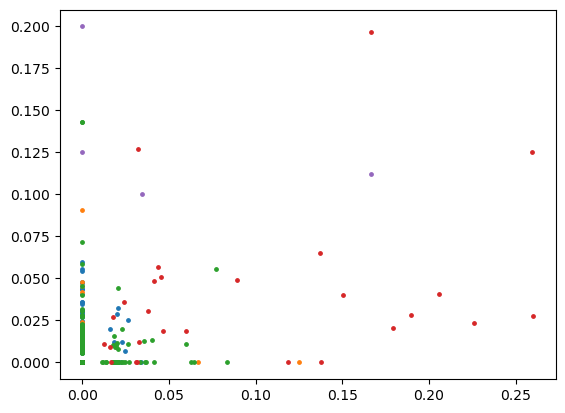

In [374]:
labels = kmeans.predict(riders_scaled_df)
# retrieve unique clusters
clusters_kmeans = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters_kmeans:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(rider_df.to_numpy()[row_ix, 15], rider_df.to_numpy()[row_ix, 25], s=6)
    # show the plot
pyplot.show()

In [375]:
labels_ss = kmeans.labels_
silhouette_avg = silhouette_score(riders_scaled_df, labels_ss)
silhouette_avg
# 1: Means clusters are well apart from each other and clearly distinguished.
# 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
# -1: Means clusters are assigned in the wrong way.

0.21973036569503882

In [376]:
clusters_kmeans = kmeans.predict(riders_scaled_df)
pd.Series(clusters_kmeans).value_counts().sort_index()

0     77
1    456
2    372
3     27
4      4
dtype: int64

In [378]:
#rider_df.drop(columns=['cluster_kmeans_all', 'cluster_kmeans_abs',
#       'cluster_kmeans_pct', 'cluster_kmeans_pca'], inplace=True)

In [379]:
rider_df["cluster_kmeans_all"] = clusters_kmeans
rider_df.to_csv('check_cluster.csv')

# Performing the clustering on reduces dimensions

In [380]:
rider_abs = riders_scaled_df.copy()
rider_pct = riders_scaled_df.copy()

rider_abs.drop(columns=['pct_win_flat','pct_pod_flat', 'pct_top10_flat', 'avg_pts_flat',
               'pct_win_climb', 'pct_pod_climb', 'pct_top10_climb','avg_pts_climb',
               'pct_win_time_trial', 'pct_pod_time_trial','pct_top10_time_trial', 'avg_pts_time_trial',
               'pct_win_gc', 'pct_pod_gc', 'pct_top10_gc', 'avg_pts_gc',
               'pct_win_one_day', 'pct_pod_one_day', 'pct_top10_one_day', 'avg_pts_one_day',
               'pct_dnf_otl'], inplace=True)

rider_pct.drop(columns=['nb_win_flat', 'nb_pod_flat','nb_top10_flat', 'pts_flat',
               'nb_win_climb', 'nb_pod_climb', 'nb_top10_climb', 'pts_climb',
               'nb_win_time_trial','nb_pod_time_trial', 'nb_top10_time_trial', 'pts_time_trial',
               'nb_win_gc', 'nb_pod_gc', 'nb_top10_gc', 'pts_gc',
               'nb_win_one_day', 'nb_pod_one_day', 'nb_top10_one_day', 'pts_one_day',
                        'nb_dnf_otl'], inplace=True)

## First with absolute numbers

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

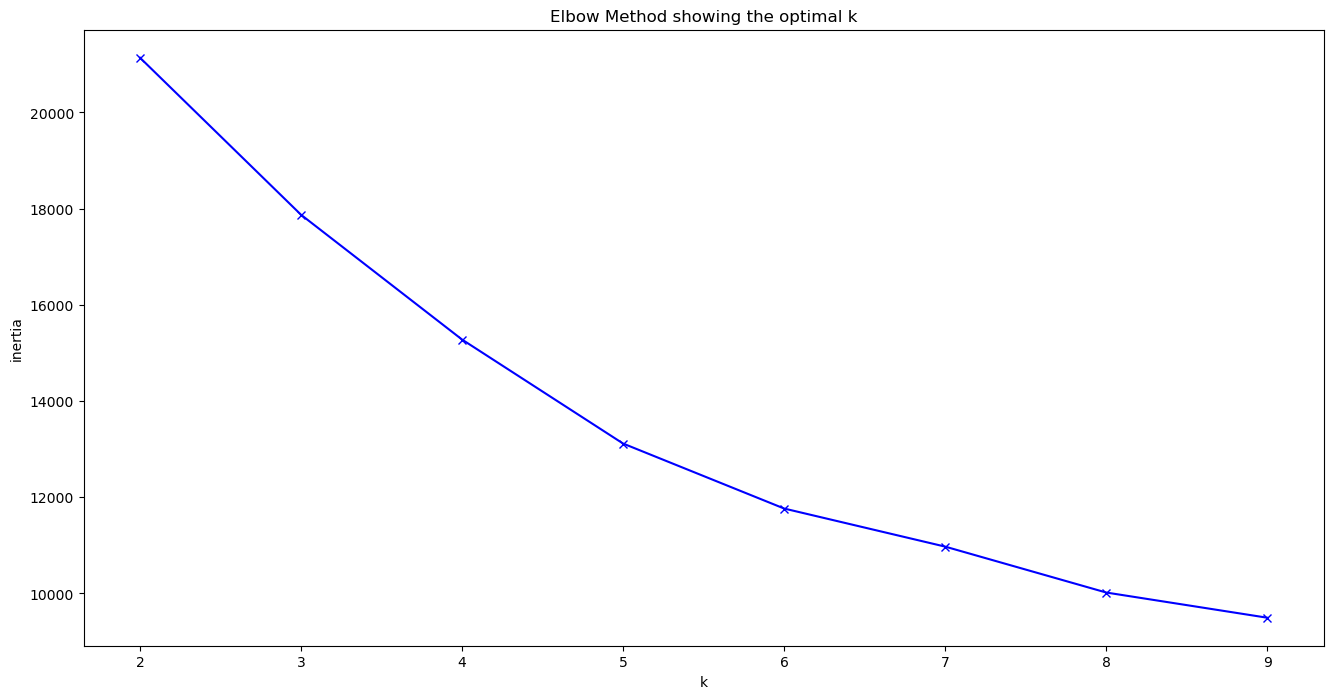

In [381]:
# determining the number of clusters for abs
K = range(2, 10)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(rider_abs)
    inertia.append(kmeans.inertia_)
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# output best one seems 5 clusters

In [382]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(rider_abs)

KMeans(n_clusters=5, random_state=1234)

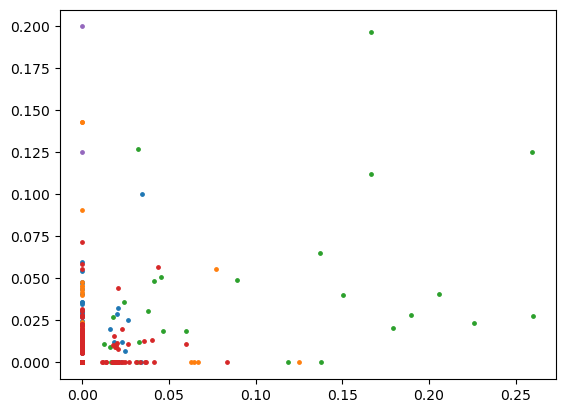

In [383]:
labels = kmeans.predict(rider_abs)
# retrieve unique clusters
clusters_kmeans = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters_kmeans:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(rider_df.to_numpy()[row_ix, 15], rider_df.to_numpy()[row_ix, 25], s=6)
    # show the plot
pyplot.show()

In [384]:
labels_ss_abs = kmeans.labels_
silhouette_avg_abs = silhouette_score(rider_abs, labels_ss_abs)
silhouette_avg_abs

0.28317592703356664

In [385]:
clusters_kmeans = kmeans.predict(rider_abs)
pd.Series(clusters_kmeans).value_counts().sort_index()

0     73
1    470
2     26
3    365
4      2
dtype: int64

In [386]:
rider_df["cluster_kmeans_abs"] = clusters_kmeans

In [387]:
rider_df.to_csv('check_cluster.csv')

## Now with percentage numbers

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

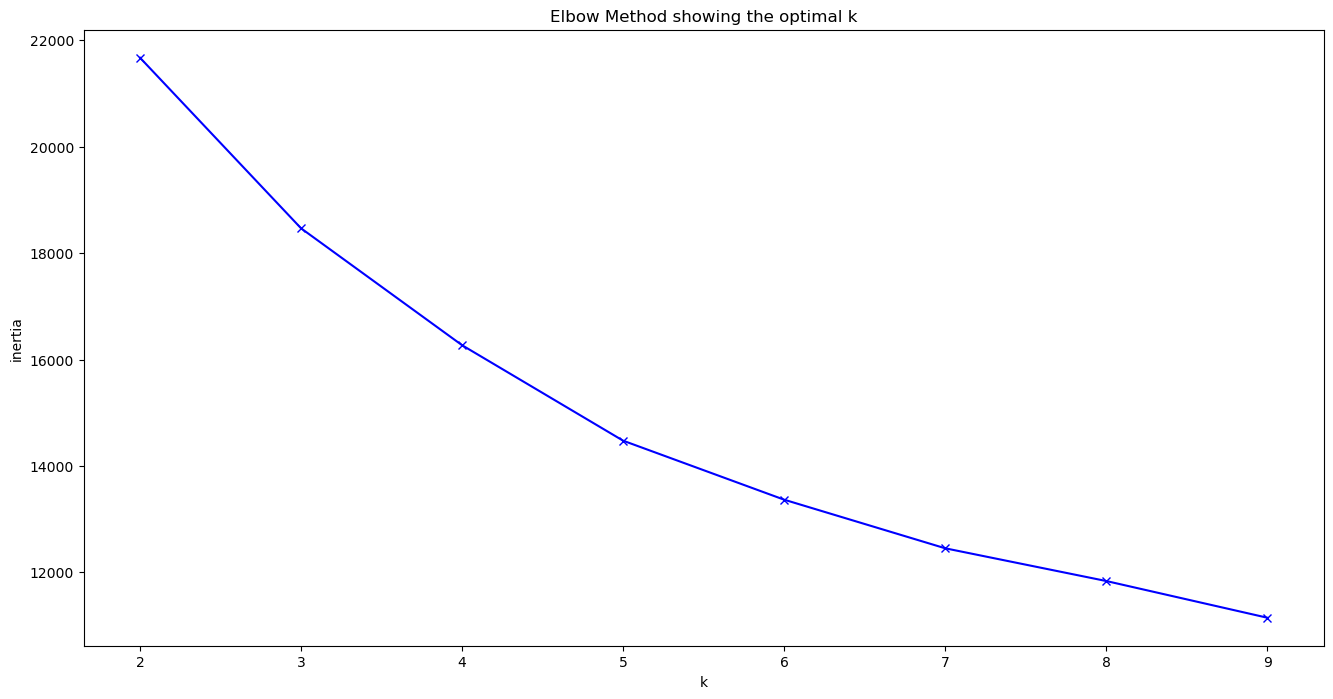

In [388]:
# determining the number of clusters for pct
K = range(2, 10)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(rider_pct)
    inertia.append(kmeans.inertia_)
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# output best one seems 5 clusters

In [389]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(rider_pct)

KMeans(n_clusters=5, random_state=1234)

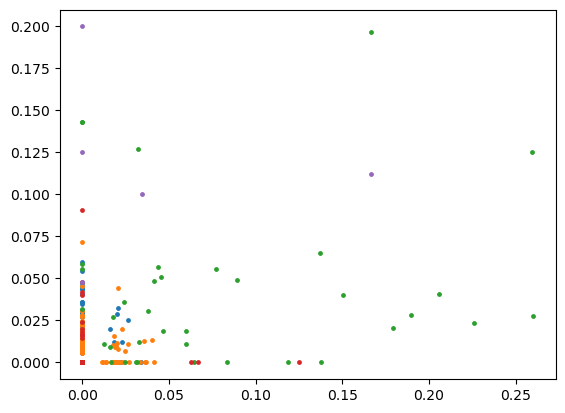

In [390]:
labels = kmeans.predict(rider_pct)
# retrieve unique clusters
clusters_kmeans = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters_kmeans:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(rider_df.to_numpy()[row_ix, 15], rider_df.to_numpy()[row_ix, 25], s=6)
    # show the plot
pyplot.show()

In [391]:
labels_ss_pct = kmeans.labels_
silhouette_avg_pct = silhouette_score(rider_pct, labels_ss_pct)
silhouette_avg_pct

0.23746007066001448

In [392]:
clusters_kmeans = kmeans.predict(rider_pct)
pd.Series(clusters_kmeans).value_counts().sort_index()

0     72
1    376
2     39
3    444
4      5
dtype: int64

In [393]:
rider_df["cluster_kmeans_pct"] = clusters_kmeans
rider_df.to_csv('check_cluster.csv')

# Performing a PCA

## Determine number of components

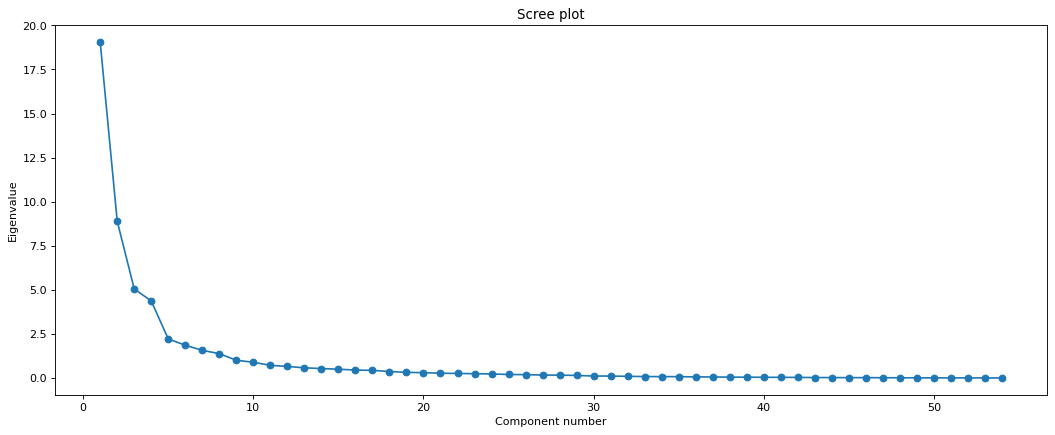

In [336]:
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
pca = PCA().fit(riders_scaled_df)
eigenvalues = pca.explained_variance_

# Create Scree plot
figure(figsize=(16, 6), dpi=80)
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

In [340]:
feature_names = riders_scaled_df.columns.values

n_components = 8
pca = PCA(n_components=n_components)
pca.fit(riders_scaled_df)

transformed_data = pca.transform(riders_scaled_df)

print("Cumulative variance explained:", np.cumsum(pca.explained_variance_ratio_))

for i, component in enumerate(pca.components_):
    top_features = sorted(zip(feature_names, component), key=lambda x: abs(x[1]), reverse=True)[:3]
    print("Top features for component {}: {}".format(i+1, top_features))

Cumulative variance explained: [0.35251367 0.51705163 0.61051171 0.69135797 0.73232444 0.76673182
 0.79573582 0.82129691]
Top features for component 1: [('avg_pts_one_day', 0.2120081145426494), ('nb_pod_climb', 0.20197843036273888), ('pts_climb', 0.20071387792192535)]
Top features for component 2: [('pts_flat', -0.24357868119087542), ('nb_top10_flat', -0.2382128907097608), ('avg_pts_flat', -0.2362243997397627)]
Top features for component 3: [('nb_race_climb', -0.3413659834841564), ('nb_gc_finished', -0.3190607622312007), ('nb_race_time_trial', -0.29927484950890415)]
Top features for component 4: [('pts_time_trial', 0.2752261830764262), ('nb_pod_time_trial', 0.2713494582071305), ('avg_pts_time_trial', 0.25652806371787684)]
Top features for component 5: [('pct_win_gc', 0.3068442720606837), ('nb_win_gc', 0.2929136022050081), ('pct_pod_gc', 0.28560795417155577)]
Top features for component 6: [('weight', 0.26561151702085584), ('nb_race_one_day', 0.2620663137548026), ('nb_dnf_otl', 0.2610218

In [ ]:
# data visualisation:
## plot pts_climb & pts_gc
## plot pts_flat & pts_time_trial
## other combination also

<AxesSubplot:xlabel='avg_pts_one_day', ylabel='nb_pod_climb'>

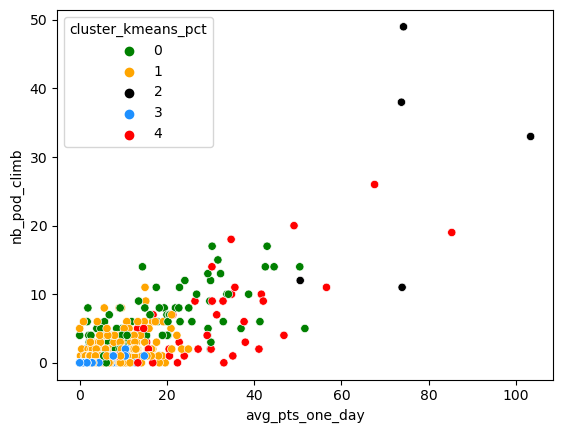

In [269]:
sns.scatterplot(x='avg_pts_one_day', y='nb_pod_climb', hue='cluster_kmeans_pct', data=rider_df, palette=['green','orange','black','dodgerblue','red'],)

# Making a decision on which one to keep

After investigation, groups avec more consistent with kmeans made based on all features, so we will keep this 

In [394]:
rider_df.columns

Index(['fullname', 'team', 'team_code', 'country', 'height', 'weight',
       'birthplace', 'rider_code', 'age', 'nb_race_flat', 'nb_win_flat',
       'nb_pod_flat', 'nb_top10_flat', 'pts_flat', 'avg_rnk_flat',
       'pct_win_flat', 'pct_pod_flat', 'pct_top10_flat', 'avg_pts_flat',
       'nb_race_climb', 'nb_win_climb', 'nb_pod_climb', 'nb_top10_climb',
       'pts_climb', 'avg_rnk_climb', 'pct_win_climb', 'pct_pod_climb',
       'pct_top10_climb', 'avg_pts_climb', 'nb_race_time_trial',
       'nb_win_time_trial', 'nb_pod_time_trial', 'nb_top10_time_trial',
       'pts_time_trial', 'avg_rnk_time_trial', 'pct_win_time_trial',
       'pct_pod_time_trial', 'pct_top10_time_trial', 'avg_pts_time_trial',
       'nb_gc_finished', 'nb_win_gc', 'nb_pod_gc', 'nb_top10_gc', 'pts_gc',
       'pct_win_gc', 'pct_pod_gc', 'pct_top10_gc', 'avg_pts_gc',
       'nb_race_one_day', 'nb_win_one_day', 'nb_pod_one_day',
       'nb_top10_one_day', 'pts_one_day', 'avg_rnk_one_day', 'pct_win_one_day',
       

In [395]:
rider_df.drop(columns=['cluster_kmeans_abs',
       'cluster_kmeans_pct'], inplace=True)

In [399]:
rider_df.rename(columns={'cluster_kmeans_all': 'group'},
          inplace=True, errors='raise')

In [400]:
rider_df.to_csv('rider_performance_metrics_with_groups.csv')

In [414]:
rider_df["group"] = rider_df["group"].astype(str)

rider_df["group"]=rider_df["group"].replace("3", "sprinter")
rider_df["group"]=rider_df["group"].replace("0", "climber")
rider_df["group"]=rider_df["group"].replace("1", "young or domestique of second zone")
rider_df["group"]=rider_df["group"].replace("2", "domestique")
rider_df["group"]=rider_df["group"].replace("4", "all-rounder")

In [415]:
rider_df["group"].value_counts()

young or domestique of second zone    456
domestique                            372
climber                                77
sprinter                               27
all-rounder                             4
Name: group, dtype: int64

In [401]:
rider_df.columns

Index(['fullname', 'team', 'team_code', 'country', 'height', 'weight',
       'birthplace', 'rider_code', 'age', 'nb_race_flat', 'nb_win_flat',
       'nb_pod_flat', 'nb_top10_flat', 'pts_flat', 'avg_rnk_flat',
       'pct_win_flat', 'pct_pod_flat', 'pct_top10_flat', 'avg_pts_flat',
       'nb_race_climb', 'nb_win_climb', 'nb_pod_climb', 'nb_top10_climb',
       'pts_climb', 'avg_rnk_climb', 'pct_win_climb', 'pct_pod_climb',
       'pct_top10_climb', 'avg_pts_climb', 'nb_race_time_trial',
       'nb_win_time_trial', 'nb_pod_time_trial', 'nb_top10_time_trial',
       'pts_time_trial', 'avg_rnk_time_trial', 'pct_win_time_trial',
       'pct_pod_time_trial', 'pct_top10_time_trial', 'avg_pts_time_trial',
       'nb_gc_finished', 'nb_win_gc', 'nb_pod_gc', 'nb_top10_gc', 'pts_gc',
       'pct_win_gc', 'pct_pod_gc', 'pct_top10_gc', 'avg_pts_gc',
       'nb_race_one_day', 'nb_win_one_day', 'nb_pod_one_day',
       'nb_top10_one_day', 'pts_one_day', 'avg_rnk_one_day', 'pct_win_one_day',
       

In [423]:
group_rider = rider_df.groupby("group").mean()
group_rider_mean = group_rider[['nb_race_flat', 'nb_win_flat', 'nb_pod_flat', 'nb_top10_flat', 'pts_flat',
            'nb_race_climb', 'nb_win_climb', 'nb_pod_climb', 'nb_top10_climb', 'pts_climb',
            'nb_race_time_trial', 'nb_win_time_trial', 'nb_pod_time_trial', 'nb_top10_time_trial', 'pts_time_trial',
            'nb_gc_finished', 'nb_win_gc', 'nb_pod_gc', 'nb_top10_gc', 'pts_gc',
            'nb_race_one_day', 'nb_win_one_day', 'nb_pod_one_day', 'nb_top10_one_day', 'pts_one_day',
            'nb_dnf_otl']]

In [429]:
group_rider_pct= group_rider[['pct_win_flat', 'pct_pod_flat', 'pct_top10_flat', 'avg_pts_flat',
                 'pct_win_climb', 'pct_pod_climb','pct_top10_climb', 'avg_pts_climb',
                 'pct_win_time_trial','pct_pod_time_trial', 'pct_top10_time_trial', 'avg_pts_time_trial',
                 'pct_win_gc', 'pct_pod_gc', 'pct_top10_gc', 'avg_pts_gc',
                 'pct_win_one_day','pct_pod_one_day', 'pct_top10_one_day', 'avg_pts_one_day', 
                 'pct_dnf_otl']]

In [430]:
group_rider_mean

,nb_race_flat,nb_win_flat,nb_pod_flat,nb_top10_flat,pts_flat,nb_race_climb,nb_win_climb,nb_pod_climb,nb_top10_climb,pts_climb,...,nb_win_gc,nb_pod_gc,nb_top10_gc,pts_gc,nb_race_one_day,nb_win_one_day,nb_pod_one_day,nb_top10_one_day,pts_one_day,nb_dnf_otl
group,,,,,,,,,,,,,,,,,,,,,
all-rounder,37.000000,2.000000,4.500000,7.250000,545.500000,111.250000,15.500000,32.750000,53.750000,3714.250000,...,4.500000,6.000000,7.000000,2050.000000,29.750000,6.500000,10.750000,15.500000,2522.750000,4.250000
climber,37.779221,0.142857,0.415584,1.376623,86.766234,120.558442,2.220779,6.714286,22.415584,954.441558,...,0.315789,1.236842,3.763158,832.526316,29.311688,0.753247,2.415584,6.883117,655.636364,5.753247
domestique,39.666667,0.147849,0.572581,2.725806,122.212366,91.446237,0.360215,1.271505,4.857527,223.924731,...,0.002725,0.013624,0.196185,128.550409,40.954301,0.244624,0.870968,3.459677,266.104839,11.182796
sprinter,57.000000,5.592593,14.481481,28.888889,1402.481481,90.703704,3.407407,8.148148,17.259259,1122.592593,...,0.000000,0.000000,0.115385,105.615385,46.518519,3.814815,9.148148,18.629630,1636.037037,9.740741
young or domestique of second zone,11.145278,0.004843,0.036320,0.266344,12.893462,20.779817,0.022936,0.077982,0.598624,28.364679,...,0.000000,0.004464,0.053571,28.767857,18.791855,0.015837,0.070136,0.547511,36.174208,6.020270


In [431]:
group_rider_pct

,pct_win_flat,pct_pod_flat,pct_top10_flat,avg_pts_flat,pct_win_climb,pct_pod_climb,pct_top10_climb,avg_pts_climb,pct_win_time_trial,pct_pod_time_trial,...,avg_pts_time_trial,pct_win_gc,pct_pod_gc,pct_top10_gc,avg_pts_gc,pct_win_one_day,pct_pod_one_day,pct_top10_one_day,avg_pts_one_day,pct_dnf_otl
group,,,,,,,,,,,,,,,,,,,,,
all-rounder,0.050287,0.109811,0.183908,13.469499,0.134311,0.280061,0.468102,33.653723,0.298535,0.570696,...,58.853388,0.390339,0.527015,0.638507,188.518773,0.241162,0.351010,0.503608,81.310155,0.028096
climber,0.002934,0.010992,0.034685,2.058648,0.018612,0.058302,0.186495,8.032484,0.030883,0.075960,...,7.100447,0.036013,0.119320,0.339022,75.765897,0.023606,0.077126,0.208418,20.151923,0.038241
domestique,0.003205,0.012948,0.062347,2.722653,0.004774,0.015967,0.057216,2.651719,0.000535,0.005059,...,0.736204,0.000341,0.001424,0.019994,14.669656,0.006192,0.021266,0.081973,6.442679,0.087264
sprinter,0.096658,0.244363,0.497147,24.640500,0.039364,0.089543,0.196622,12.704886,0.002959,0.019470,...,1.527674,0.000000,0.000000,0.012044,11.949232,0.088282,0.207700,0.400175,35.651835,0.065352
young or domestique of second zone,0.000464,0.003873,0.023425,0.980715,0.000759,0.003359,0.028499,1.343821,0.001232,0.013300,...,0.643612,0.000000,0.000893,0.016592,9.838046,0.000896,0.004601,0.029782,1.785328,0.259717


In [434]:
group_rider_mean.to_csv('group_mean_performance_avg.csv')

In [436]:
group_rider_pct.to_csv('group_mean_performance_pct.csv')

# recommendation on race

In [451]:
def team_ranking():
    list_team = rider_df['team'].unique()
    
    while True:
        try:
            print("Please select a team:")
            for i, team in enumerate(list_team):
                print(f"{i+1}. {team}")
            team_idx = int(input(f"Please enter the number corresponding to the team name: "))
            if team_idx not in range(1, len(list_team)+1):
                raise ValueError
            team_name = list_team[team_idx-1]
            break
        except ValueError:
            print("Invalid input. Please try again.")
    
    while True:
        try:
            race_type = int(input("Please enter the race type (0 for one day race, 1 for stage race): "))
            if race_type not in [0, 1]:
                raise ValueError
            break
        except ValueError:
            print("Invalid input. Please try again.")
    
    while True:
        try:
            time_trial = int(input("Please enter whether it is a time trial (0 for no, 1 for yes): "))
            if time_trial not in [0, 1]:
                raise ValueError
            break
        except ValueError:
            print("Invalid input. Please try again.")
    
    while True:
        try:
            profile_score = int(input("Please enter the profile score (between 0 and 999): "))
            if profile_score not in range(0, 1000):
                raise ValueError
            break
        except ValueError:
            print("Invalid input. Please try again.")
    
    team_df = rider_df[rider_df['team'] == team_name]
    
    if race_type == 1:
        team_df = team_df.sort_values(by=['avg_pts_gc'], ascending=False)
        ranking_type = 'avg_pts_gc'
    elif time_trial == 1:
        team_df = team_df.sort_values(by=['avg_pts_time_trial'], ascending=False)
        ranking_type = 'avg_pts_time_trial'
    elif profile_score <= 50:
        team_df = team_df.sort_values(by=['avg_pts_flat'], ascending=False)
        ranking_type = 'avg_pts_flat'
    elif profile_score > 100:
        team_df = team_df.sort_values(by=['avg_pts_climb'], ascending=False)
        ranking_type = 'avg_pts_climb'
    else:
        print("Invalid profile score. No ranking criteria selected.")
        return
    
    print("Team ranking:")
    for i, row in team_df.iterrows():
        print(f"{row['fullname']}: {row[ranking_type]}")

In [454]:
team_ranking()

Please select a team:
1. bora - hansgrohe
2. cofidis
3. ef education-easypost
4. groupama - fdj
5. ineos grenadiers
6. intermarché - circus - wanty
7. jumbo-visma
8. movistar team
9. soudal - quick step
10. team arkéa samsic
11. team jayco alula
12. team dsm
13. trek - segafredo
14. ag2r citroën team
15. uae team emirates
16. alpecin-deceuninck
17. astana qazaqstan team
18. bahrain - victorious
19. bingoal wb
20. bolton equities black spoke
21. burgos-bh
22. caja rural - seguros rga
23. eolo-kometa
24. equipo kern pharma
25. euskaltel - euskadi
26. green project-bardiani csf-faizanè
27. human powered health
28. israel - premier tech
29. lotto dstny
30. team corratec
31. team flanders - baloise
32. team novo nordisk
33. totalenergies
34. tudor pro cycling team
35. uno-x pro cycling team
36. q36.5 pro cycling team
Please enter the number corresponding to the team name: 0
Invalid input. Please try again.
Please select a team:
1. bora - hansgrohe
2. cofidis
3. ef education-easypost
4. grou

# Find best replacement

In [462]:
from difflib import SequenceMatcher
from fuzzywuzzy import process

def find_best_matches(rider_df):

    name = input("Enter rider name: ")
    matches = process.extract(name, rider_df['fullname'], limit=1)
    if len(matches) == 0:
        return []
    best_match = matches[0][0]
    
    group = rider_df[rider_df['fullname'] == best_match]['group'].iloc[0]

    group_df = rider_df[rider_df['group'] == group]

    group_df['similarity'] = group_df['fullname'].apply(lambda x: SequenceMatcher(None, x, name).ratio())

    group_df = group_df.sort_values('similarity', ascending=False)
    return group_df.head(5)['fullname'].tolist()

In [473]:
matches = find_best_matches(rider_df)
print(matches)

rider_df_sugg_list = []
for match in matches:
    rider_df_suggestion = rider_df[rider_df['fullname'] == match]
    rider_df_sugg_list.append(rider_df_suggestion)

suggested_riders = pd.concat(rider_df_sugg_list)
suggested_riders

Enter rider name: kasper asgreen
['kasper  asgreen ', 'marc  soler ', 'aleksandr  vlasov ', 'mikel  landa ', 'daniel felipe  martínez ']


C:\Users\buldu\AppData\Local\Temp\ipykernel_16432\3335463894.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df['similarity'] = group_df['fullname'].apply(lambda x: SequenceMatcher(None, x, name).ratio())


,fullname,team,team_code,country,height,weight,birthplace,rider_code,age,nb_race_flat,...,nb_top10_one_day,pts_one_day,avg_rnk_one_day,pct_win_one_day,pct_pod_one_day,pct_top10_one_day,avg_pts_one_day,nb_dnf_otl,pct_dnf_otl,group
243,kasper asgreen,soudal - quick step,soudal-quick-step-2023,denmark,1.92,75.0,kolding,kasper-asgreen,28.0,50.0,...,9.0,1316.0,39.647059,0.075000,0.125000,0.225000,32.900000,6.0,0.035503,climber
423,marc soler,uae team emirates,uae-team-emirates-2023,spain,1.86,68.0,vilanova i la geltrú,marc-soler,29.0,43.0,...,0.0,30.0,64.583333,0.000000,0.000000,0.000000,1.875000,7.0,0.030973,climber
3,aleksandr vlasov,bora - hansgrohe,bora-hansgrohe-2023,russia,1.86,68.0,vyborg,aleksandr-vlasov,26.0,31.0,...,8.0,780.0,26.695652,0.038462,0.192308,0.307692,30.000000,6.0,0.039216,climber
503,mikel landa,bahrain - victorious,bahrain-victorious-2023,spain,1.73,60.0,murgia,mikel-landa,33.0,38.0,...,4.0,392.0,38.500000,0.000000,0.105263,0.210526,20.631579,11.0,0.064706,climber
124,daniel felipe martínez,ineos grenadiers,ineos-grenadiers-2023,colombia,1.72,63.0,soacha,daniel-felipe-martinez,26.0,33.0,...,4.0,507.0,24.400000,0.058824,0.117647,0.235294,29.823529,3.0,0.018750,climber


# Find best replacement

In [494]:
import pandas as pd

def select_rider():
    
    while True:
        try:
            talent = int(input("Enter 0 for underdog/new talent, 1 for confirmed rider: "))
            rider_type = int(input("Enter 0 for sprinter, 1 for climber: "))
            if talent not in [0, 1] or rider_type not in [0, 1]:
                raise ValueError
            break
        except ValueError:
            print('Invalid input, please try again.')
    
    if talent == 1 and rider_type == 0:
        filter_df = rider_df[rider_df['group'] == 'sprinter']
        rank_df = filter_df.sort_values('avg_pts_flat', ascending=False)
        return rank_df[['fullname', 'avg_pts_flat']]
    
    elif talent == 1 and rider_type == 1:
        filter_df = rider_df[rider_df['group'].isin(['climber', 'all-rounder'])]
        rank_df = filter_df.sort_values('avg_pts_climb', ascending=False)
        return rank_df[['fullname', 'avg_pts_climb']]
    
    elif talent == 0 and rider_type == 0:
        filter_df = rider_df[rider_df['group'].isin(['young or domestique of second zone', 'domestique'])]
        rank_df = filter_df.sort_values('avg_pts_flat', ascending=False)
        return rank_df[['fullname', 'avg_pts_flat']]
    
    elif talent == 0 and rider_type == 1:
        filter_df = rider_df[rider_df['group'].isin(['young or domestique of second zone', 'domestique'])]
        rank_df = filter_df.sort_values('avg_pts_climb', ascending=False)
        return rank_df[['fullname', 'avg_pts_climb']]
        
    else:
        print('Invalid input')
        return None, None

In [498]:
select_rider()

Enter 0 for underdog/new talent, 1 for confirmed rider: 1
Enter 0 for sprinter, 1 for climber: 0


,fullname,avg_pts_flat
443,mathieu van der poel,38.766667
758,arnaud de lie,38.592593
241,tim merlier,35.967742
444,jasper philipsen,34.410959
753,caleb ewan,31.897059
265,nacer bouhanni,31.343750
242,fabio jakobsen,30.980000
297,dylan groenewegen,30.254237
419,pascal ackermann,28.945205
90,arnaud démare,28.253731
